#**Predict Hazard Ratings for a Maintenance Project**

$ All~the~money~in~the~world~can~not~make~up~for~a~loss~of~life.$


*  Better safe than sorry is the motto of all engineering and construction practices which routinely deal with dangerous situations. 
*  However many times , extent of caution is just not enough and leads to very hard learnt lessons 
in employee safety.
*  Instead of relying on something going wrong and then taking preventive measure, organisations are coming up with ways of assessing the extent of danger to life for a new project before even the first hammer strikes .

**Given is a masked dataset which contains various properties of tasks taken up in heavy equipments maintenance by a manual crew. Each of these tasks have been given a hazard score which is eventually used in deciding levels of safety checks and caution while planning for the maintenance process.**

**Data Files**

> **Train Dataset = Hazard_train.csv**

> **Test Dataset = Hazard_test_share.csv**

## Formal Problem Statement

Variable names are **masked** and there is no formal data dictionary.

Task here is to build a predictive model for predicting hazard score given other information
related to maintenance tasks. 

**Build the model on train dataset.**

**Test dataset does not have a response column.**

>**Target column = Hazard**


## Evaluation Criterion

Work on creating the machine learning models and choosing the one which gives the best performance.

For this project, score will be calculated as:

> **Score = 1-(MAE/5.4)**

Where ***MAE*** is ***mean absolute error*** on test file. 

Score more than ***0.5***. 

### Focus on minimising MAE.


In [ ]:
# Importing the important libraries for Data Preparation, Data Wrangling, and Data Visualization

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_data = pd.read_csv('/content/Hazard_train.csv')
test_data = pd.read_csv('/content/Hazard_test_share.csv')

In [ ]:
train_data.head()

,Id,Hazard,T1_V1,T1_V2,T1_V3,T1_V4,T1_V5,T1_V6,T1_V7,T1_V8,T1_V9,T1_V10,T1_V11,T1_V12,T1_V13,T1_V14,T1_V15,T1_V16,T1_V17,T2_V1,T2_V2,T2_V3,T2_V4,T2_V5,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V11,T2_V12,T2_V13,T2_V14,T2_V15
0,83642,2,10,23,4,N,K,Y,B,D,E,2,H,B,10,0,A,K,N,52,14,N,8,C,2,37,1,11,2,Y,N,E,2,1
1,92530,6,3,18,2,B,H,N,B,B,D,8,L,B,10,3,A,B,N,39,14,Y,13,A,2,34,1,12,7,Y,N,C,3,3
2,86131,4,5,20,4,B,K,N,B,B,E,7,H,B,15,1,A,K,N,66,10,N,8,C,1,40,1,17,4,Y,N,D,1,1
3,88666,1,4,7,5,N,H,N,B,B,B,8,B,B,15,3,A,B,N,48,11,N,11,B,2,37,1,11,6,Y,N,D,2,1
4,11122,21,10,21,6,N,C,Y,B,C,D,12,L,B,10,1,A,I,N,42,11,N,11,A,2,40,1,6,6,N,N,D,5,5


In [ ]:
test_data.head()

,Id,T1_V1,T1_V2,T1_V3,T1_V4,T1_V5,T1_V6,T1_V7,T1_V8,T1_V9,T1_V10,T1_V11,T1_V12,T1_V13,T1_V14,T1_V15,T1_V16,T1_V17,T2_V1,T2_V2,T2_V3,T2_V4,T2_V5,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V11,T2_V12,T2_V13,T2_V14,T2_V15
0,67943,9,18,2,N,B,Y,B,C,D,12,B,B,20,1,A,D,Y,75,13,N,5,A,2,34,1,14,4,Y,N,E,3,3
1,38287,12,20,5,N,C,Y,D,B,D,12,B,B,10,1,A,E,N,27,8,Y,15,B,1,40,1,9,3,Y,N,E,1,1
2,51951,14,18,1,N,K,Y,B,D,E,12,M,C,5,1,A,J,N,55,18,N,18,A,2,25,1,1,4,Y,N,E,2,1
3,40476,19,16,1,W,H,Y,B,B,D,3,L,B,10,1,A,D,N,25,28,N,16,A,2,25,1,1,7,Y,N,D,2,11
4,101190,12,21,2,B,K,Y,B,B,E,2,H,B,10,3,D,R,N,51,23,N,10,C,2,22,1,20,6,Y,N,C,2,1


#Data Visualization & Data Wrangling

We will see if train data have some missing values, object data types, numerical data types, visualize the important features to have in data for building data.

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40799 entries, 0 to 40798
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      40799 non-null  int64 
 1   Hazard  40799 non-null  int64 
 2   T1_V1   40799 non-null  int64 
 3   T1_V2   40799 non-null  int64 
 4   T1_V3   40799 non-null  int64 
 5   T1_V4   40799 non-null  object
 6   T1_V5   40799 non-null  object
 7   T1_V6   40799 non-null  object
 8   T1_V7   40799 non-null  object
 9   T1_V8   40799 non-null  object
 10  T1_V9   40799 non-null  object
 11  T1_V10  40799 non-null  int64 
 12  T1_V11  40799 non-null  object
 13  T1_V12  40799 non-null  object
 14  T1_V13  40799 non-null  int64 
 15  T1_V14  40799 non-null  int64 
 16  T1_V15  40799 non-null  object
 17  T1_V16  40799 non-null  object
 18  T1_V17  40799 non-null  object
 19  T2_V1   40799 non-null  int64 
 20  T2_V2   40799 non-null  int64 
 21  T2_V3   40799 non-null  object
 22  T2_V4   40799 non-null

The data is only of two types -> 'Object' or 'Int64'.

In [ ]:
print(train_data.isnull().sum())

Id        0
Hazard    0
T1_V1     0
T1_V2     0
T1_V3     0
T1_V4     0
T1_V5     0
T1_V6     0
T1_V7     0
T1_V8     0
T1_V9     0
T1_V10    0
T1_V11    0
T1_V12    0
T1_V13    0
T1_V14    0
T1_V15    0
T1_V16    0
T1_V17    0
T2_V1     0
T2_V2     0
T2_V3     0
T2_V4     0
T2_V5     0
T2_V6     0
T2_V7     0
T2_V8     0
T2_V9     0
T2_V10    0
T2_V11    0
T2_V12    0
T2_V13    0
T2_V14    0
T2_V15    0
dtype: int64


Train Data doesn't show any null values in it.

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      10200 non-null  int64 
 1   T1_V1   10200 non-null  int64 
 2   T1_V2   10200 non-null  int64 
 3   T1_V3   10200 non-null  int64 
 4   T1_V4   10200 non-null  object
 5   T1_V5   10200 non-null  object
 6   T1_V6   10200 non-null  object
 7   T1_V7   10200 non-null  object
 8   T1_V8   10200 non-null  object
 9   T1_V9   10200 non-null  object
 10  T1_V10  10200 non-null  int64 
 11  T1_V11  10200 non-null  object
 12  T1_V12  10200 non-null  object
 13  T1_V13  10200 non-null  int64 
 14  T1_V14  10200 non-null  int64 
 15  T1_V15  10200 non-null  object
 16  T1_V16  10200 non-null  object
 17  T1_V17  10200 non-null  object
 18  T2_V1   10200 non-null  int64 
 19  T2_V2   10200 non-null  int64 
 20  T2_V3   10200 non-null  object
 21  T2_V4   10200 non-null  int64 
 22  T2_V5   10200 non-null

In [ ]:
test_data.isnull().sum()

Id        0
T1_V1     0
T1_V2     0
T1_V3     0
T1_V4     0
T1_V5     0
T1_V6     0
T1_V7     0
T1_V8     0
T1_V9     0
T1_V10    0
T1_V11    0
T1_V12    0
T1_V13    0
T1_V14    0
T1_V15    0
T1_V16    0
T1_V17    0
T2_V1     0
T2_V2     0
T2_V3     0
T2_V4     0
T2_V5     0
T2_V6     0
T2_V7     0
T2_V8     0
T2_V9     0
T2_V10    0
T2_V11    0
T2_V12    0
T2_V13    0
T2_V14    0
T2_V15    0
dtype: int64

Same for the test data.

In [ ]:
print(f'Shape of Train Data : No. of Rows - {train_data.shape[0]} | No. of Columns - {train_data.shape[1]}')
print(f'Shape of Test Data : No. of Rows = {test_data.shape[0]} | No. of Columns - {test_data.shape[1]}')

Shape of Train Data : No. of Rows - 40799 | No. of Columns - 34
Shape of Test Data : No. of Rows = 10200 | No. of Columns - 33


In [ ]:
num_cols = [i for i in train_data.columns if train_data[i].dtypes != 'O' and i not in ['Id', 'Hazard']]
cat_cols = [i for i in train_data.columns if train_data[i].dtypes == 'O']

num_cols_test = [i for i in test_data.columns if test_data[i].dtypes != 'O' and i not in ['Id']]
cat_cols_test = [i for i in test_data.columns if test_data[i].dtypes == 'O']

In [ ]:
print(f'No. of numerical data in Train Dataset : {len(num_cols)} | No. of categorical data in Train dataset : {len(cat_cols)}')
print(f'No. of numerical data in Test Dataset : {len(num_cols_test)} | No. of categorical data in Test Dataset : {len(cat_cols_test)}')

No. of numerical data in Train Dataset : 16 | No. of categorical data in Train dataset : 16
No. of numerical data in Test Dataset : 16 | No. of categorical data in Test Dataset : 16


Each of the dataset have 16 numerical & 16 categorical data respectively.

Now we will visualize some insights of the data, to explore the findings among the columns.

##Data Visualization

In [ ]:
train_data[num_cols].describe()

,T1_V1,T1_V2,T1_V3,T1_V10,T1_V13,T1_V14,T2_V1,T2_V2,T2_V4,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V14,T2_V15
count,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000
mean,9.723645,12.849359,3.190691,7.025123,14.009902,1.582416,57.568641,12.410451,10.251403,1.947499,33.504620,1.031349,12.496973,4.489963,2.448344,3.482512
std,5.170715,6.257502,1.742044,3.596619,4.649012,0.865121,23.461468,4.785406,4.845443,0.795249,5.830512,0.191676,7.313552,1.899386,1.257293,3.070911
min,1.000000,1.000000,1.000000,2.000000,5.000000,0.000000,1.000000,1.000000,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,6.000000,7.000000,2.000000,3.000000,10.000000,1.000000,40.000000,9.000000,6.000000,2.000000,31.000000,1.000000,6.000000,3.000000,2.000000,1.000000
50%,9.000000,14.000000,3.000000,8.000000,15.000000,1.000000,55.000000,11.000000,10.000000,2.000000,34.000000,1.000000,14.000000,4.000000,2.000000,2.000000
75%,14.000000,18.000000,4.000000,12.000000,20.000000,2.000000,77.000000,15.000000,14.000000,2.000000,40.000000,1.000000,18.000000,6.000000,3.000000,5.000000
max,19.000000,24.000000,9.000000,12.000000,20.000000,4.000000,100.000000,39.000000,22.000000,7.000000,40.000000,3.000000,25.000000,7.000000,7.000000,12.000000


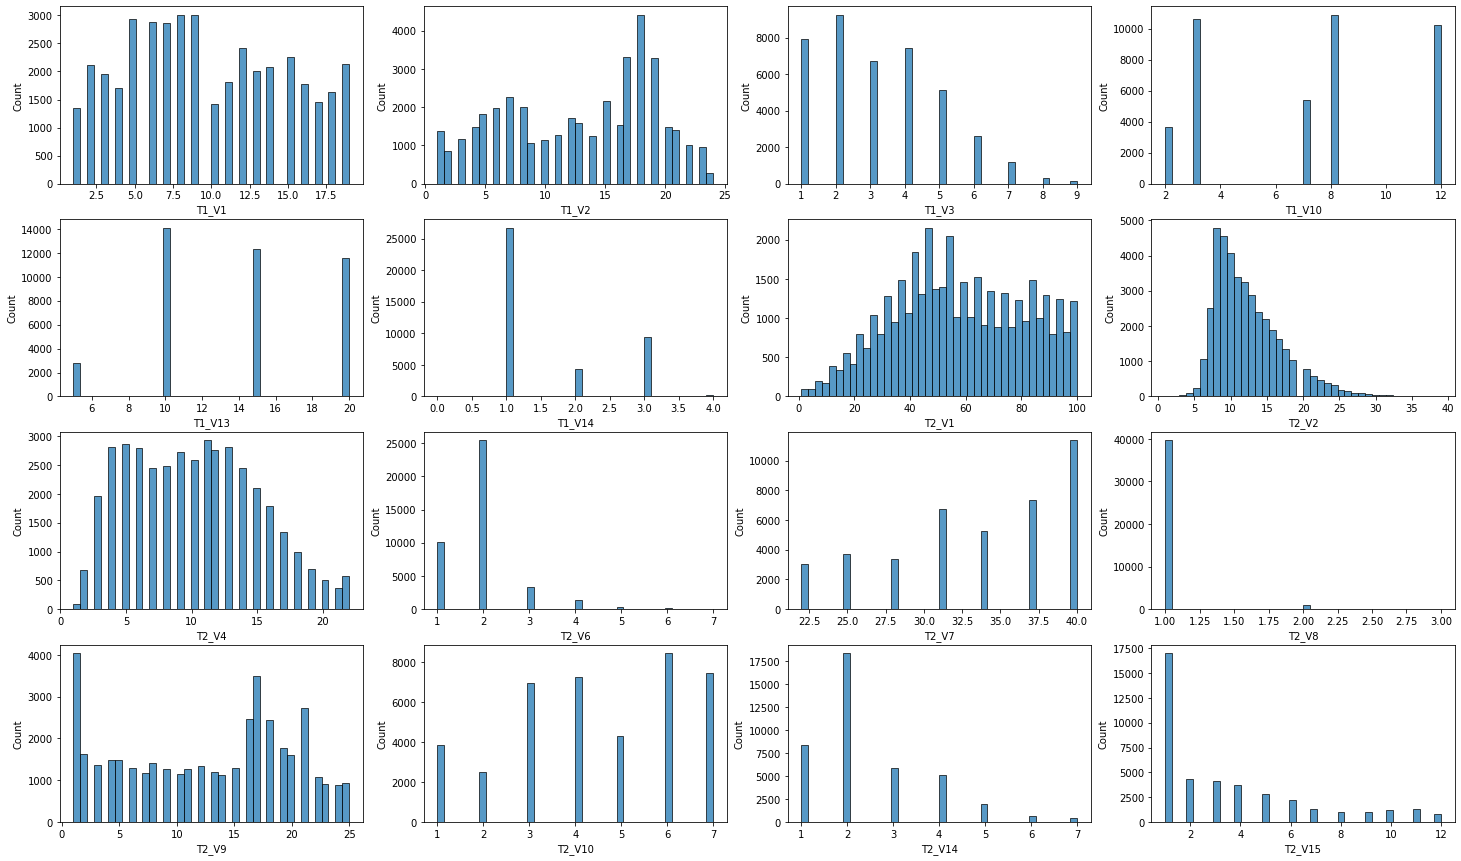

In [ ]:
k = 0
fig, axes = plt.subplots(4, 4, figsize=(25, 15))
for i in range(4):
  for j in range(4):
    sns.histplot(ax = axes[i,j], x = train_data[num_cols[k]], bins = 40)
    k = k+1

As we can see from the histogram plot of the data, some of the columns are behaving like categorical variables, rather than numerical data type.

T1_V3, T1_V13, T1_V14, T2_V6, T2_V7, T2_V8, T2_V10, T2_V14, T2_V15

In [ ]:
rem_cols = ['T1_V3', 'T1_V13', 'T1_V14', 'T2_V6', 'T2_V7', 'T2_V8', 'T2_V10', 'T2_V14', 'T2_V15']

In [ ]:
for i in rem_cols:
  print(f'{i} unique elements : {train_data[i].unique()}')

T1_V3 unique elements : [4 2 5 6 1 3 7 8 9]
T1_V13 unique elements : [10 15 20  5]
T1_V14 unique elements : [0 3 1 2 4]
T2_V6 unique elements : [2 1 3 4 5 7 6]
T2_V7 unique elements : [37 34 40 25 28 22 31]
T2_V8 unique elements : [1 2 3]
T2_V10 unique elements : [2 7 4 6 3 5 1]
T2_V14 unique elements : [2 3 1 5 4 6 7]
T2_V15 unique elements : [ 1  3  5  4  2 10  7 11  8  6 12  9]


In [ ]:
for i in rem_cols:
  num_cols.remove(i)

In [ ]:
len(num_cols)
print(num_cols)

['T1_V1', 'T1_V2', 'T1_V10', 'T2_V1', 'T2_V2', 'T2_V4', 'T2_V9']


We will treat them as categorical data.

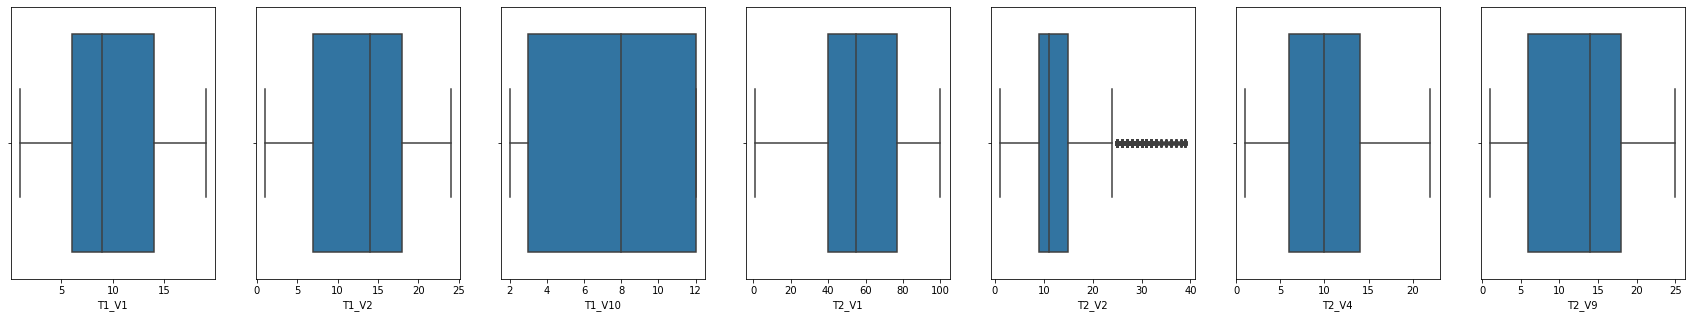

In [ ]:
k = 0
fig, axes = plt.subplots(1, 7, figsize=(30, 5))
for j in range(7):
  sns.boxplot(ax = axes[j], x = train_data[num_cols[k]])
  k = k+1

The T2_V2 has some outliers.

In [ ]:
train_data[num_cols].describe()

,T1_V1,T1_V2,T1_V10,T2_V1,T2_V2,T2_V4,T2_V9
count,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000
mean,9.723645,12.849359,7.025123,57.568641,12.410451,10.251403,12.496973
std,5.170715,6.257502,3.596619,23.461468,4.785406,4.845443,7.313552
min,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
25%,6.000000,7.000000,3.000000,40.000000,9.000000,6.000000,6.000000
50%,9.000000,14.000000,8.000000,55.000000,11.000000,10.000000,14.000000
75%,14.000000,18.000000,12.000000,77.000000,15.000000,14.000000,18.000000
max,19.000000,24.000000,12.000000,100.000000,39.000000,22.000000,25.000000


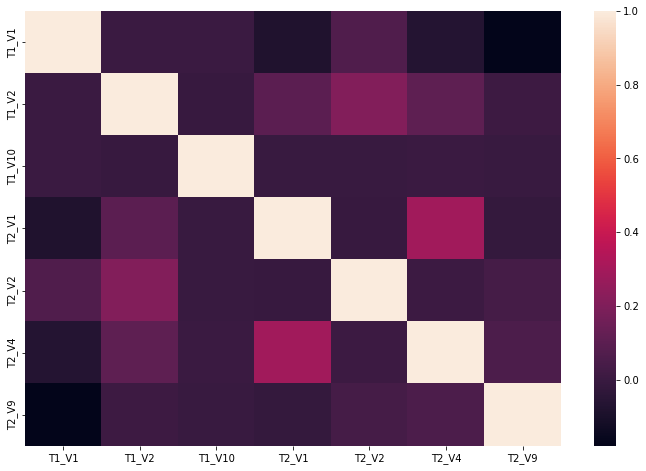

In [ ]:
plt.figure(figsize = (12, 8))
sns.heatmap(train_data[num_cols].corr())

As we can see the numerical columns are weakly correlated or not correalted to each other.

They can be treated as important features for our model building.

Since the remaining numerical variables are treated as ordinal one, we can use **Kendall Rank Correlation** to find the relation among them.

In [ ]:
from scipy.stats import kendalltau

In [ ]:
corr_df = pd.DataFrame(columns = rem_cols, index = rem_cols)
for i in rem_cols:
  for j in rem_cols:
    coef, p = kendalltau(train_data[i], train_data[j])
    #print('Kendall correlation coefficient: %.3f' % coef)
    alpha = .05

    if p>alpha:
      corr_df[i][j] = 0
    else:
      corr_df[i][j] = 1

In [ ]:
corr_df

,T1_V3,T1_V13,T1_V14,T2_V6,T2_V7,T2_V8,T2_V10,T2_V14,T2_V15
T1_V3,1,0,1,1,0,1,0,1,1
T1_V13,0,1,0,0,0,0,0,1,0
T1_V14,1,0,1,1,0,1,0,1,0
T2_V6,1,0,1,1,0,1,0,1,1
T2_V7,0,0,0,0,1,0,0,0,0
T2_V8,1,0,1,1,0,1,0,1,1
T2_V10,0,0,0,0,0,0,1,0,0
T2_V14,1,1,1,1,0,1,0,1,1
T2_V15,1,0,0,1,0,1,0,1,1


The **corr_df** shows here that the **1** represents the correlation between the two variables and **0** reprensents no correlation.

Now we will find the **Rank** of the matrix generated, to find the number of independent variables.

Using **Rank-Nullity Theorem** : 

**Nullity of Matrix** + **Rank of Matrix** **=** **Total number of variables**

In [ ]:
rank_lst = []
for i in ['T1_V3']:
  for j in rem_cols:
    #print(corr_df[j].values)
    rank_lst.append(list(corr_df[j].values))
rank_lst                                        # converting the dataframe to matrix form.

[[1, 0, 1, 1, 0, 1, 0, 1, 1],
 [0, 1, 0, 0, 0, 0, 0, 1, 0],
 [1, 0, 1, 1, 0, 1, 0, 1, 0],
 [1, 0, 1, 1, 0, 1, 0, 1, 1],
 [0, 0, 0, 0, 1, 0, 0, 0, 0],
 [1, 0, 1, 1, 0, 1, 0, 1, 1],
 [0, 0, 0, 0, 0, 0, 1, 0, 0],
 [1, 1, 1, 1, 0, 1, 0, 1, 1],
 [1, 0, 0, 1, 0, 1, 0, 1, 1]]

In [ ]:
rank = np.linalg.matrix_rank(rank_lst)
from sympy import Matrix 
A = Matrix(rank_lst) 
n = A.shape[1] 
rank = A.rank() 
nullity = n - rank 
print(f'Rank of Matrix : {rank}')
print(f"Nullity : {nullity}")
print(f'Total number of variables : {n}')

Rank of Matrix : 7
Nullity : 2
Total number of variables : 9


Hence it satisfy the theorem.

Now we can choose 7 independent variables from it and drop the remainning two.

Dropped columns : **T2_V14**, **T2_V15**

Now let's see the Categorical Columns

In [ ]:
for i in cat_cols:
  print(f'{i} have unique elements : {train_data[i].unique()} | Count : {train_data[i].nunique()}')

T1_V4 have unique elements : ['N' 'B' 'C' 'W' 'E' 'S' 'G' 'H'] | Count : 8
T1_V5 have unique elements : ['K' 'H' 'C' 'I' 'A' 'B' 'D' 'J' 'E' 'L'] | Count : 10
T1_V6 have unique elements : ['Y' 'N'] | Count : 2
T1_V7 have unique elements : ['B' 'D' 'A' 'C'] | Count : 4
T1_V8 have unique elements : ['D' 'B' 'C' 'A'] | Count : 4
T1_V9 have unique elements : ['E' 'D' 'B' 'F' 'G' 'C'] | Count : 6
T1_V11 have unique elements : ['H' 'L' 'B' 'N' 'A' 'E' 'J' 'I' 'F' 'K' 'M' 'D'] | Count : 12
T1_V12 have unique elements : ['B' 'A' 'C' 'D'] | Count : 4
T1_V15 have unique elements : ['A' 'C' 'N' 'W' 'H' 'D' 'S' 'F'] | Count : 8
T1_V16 have unique elements : ['K' 'B' 'I' 'R' 'D' 'A' 'M' 'J' 'O' 'E' 'Q' 'L' 'H' 'N' 'C' 'G' 'P' 'F'] | Count : 18
T1_V17 have unique elements : ['N' 'Y'] | Count : 2
T2_V3 have unique elements : ['N' 'Y'] | Count : 2
T2_V5 have unique elements : ['C' 'A' 'B' 'E' 'D' 'F'] | Count : 6
T2_V11 have unique elements : ['Y' 'N'] | Count : 2
T2_V12 have unique elements : ['N' 'Y

Where the categorical data columns are upto 2 unique values we can apply **One Hot Encoding**.

Where the categorical data columns are greater than 2 and upto 6 unique values we will apply **Ordinal Encoding**.

And for the rest of the columns we will apply **Mean Encoding**.

In [ ]:
y_n_cols = []
for i in cat_cols:
  if train_data[i].nunique()==2:
    y_n_cols.append(i)

print(y_n_cols)

['T1_V6', 'T1_V17', 'T2_V3', 'T2_V11', 'T2_V12']


In [ ]:
ord_cols = []
for i in cat_cols:
  if (train_data[i].nunique()>2 and train_data[i].nunique()<6):
    ord_cols.append(i)

print(ord_cols)

['T1_V7', 'T1_V8', 'T1_V12', 'T2_V13']


In [ ]:
mean_cols = [i for i in cat_cols if i not in (y_n_cols + ord_cols)]
print(mean_cols)

['T1_V4', 'T1_V5', 'T1_V9', 'T1_V11', 'T1_V15', 'T1_V16', 'T2_V5']


##Data Wrangling

> Handling numerical column : T2_V2

> Dropping T2_V14 and T2_V15

> Treating the remaining numerical categorical columns with mean encoding

> Converting the categorical columns using :
 

*   One Hot Encoding
*   Ordinal Encoding
*   Mean Encoding

### Handling T2_V2 column

In [ ]:
Q1 = train_data['T2_V2'].quantile(.25)
Q3 = train_data['T2_V2'].quantile(.75)
IQR = Q3-Q1
low_range = Q1 - (1.5*IQR)
up_range = Q3 + (1.5*IQR)
print('Q1 : ', Q1)
print('Q3 : ', Q3)
print('IQR : ', IQR)
print('low_range : ', low_range)
print('up_range : ', up_range)

for i in range(train_data.shape[0]):
  if (train_data['T2_V2'][i]>low_range and train_data['T2_V2'][i]<up_range):
    pass
  else:
    train_data['T2_V2'][i] = np.nan

train_data['T2_V2'] = train_data['T2_V2'].fillna(train_data['T2_V2'].median())

Q1 :  9.0
Q3 :  15.0
IQR :  6.0
low_range :  0.0
up_range :  24.0


In [ ]:
Q1 = test_data['T2_V2'].quantile(.25)
Q3 = test_data['T2_V2'].quantile(.75)
IQR = Q3-Q1
low_range = Q1 - (1.5*IQR)
up_range = Q3 + (1.5*IQR)
print('Q1 : ', Q1)
print('Q3 : ', Q3)
print('IQR : ', IQR)
print('low_range : ', low_range)
print('up_range : ', up_range)

for i in range(test_data.shape[0]):
  if (test_data['T2_V2'][i]>low_range and test_data['T2_V2'][i]<up_range):
    pass
  else:
    test_data['T2_V2'][i] = np.nan

test_data['T2_V2'] = test_data['T2_V2'].fillna(test_data['T2_V2'].median())

Q1 :  9.0
Q3 :  15.0
IQR :  6.0
low_range :  0.0
up_range :  24.0


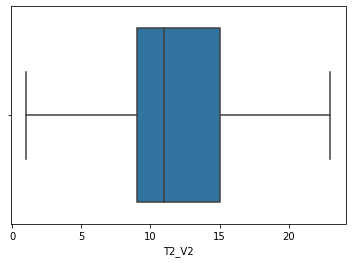

In [ ]:
sns.boxplot(train_data['T2_V2'])

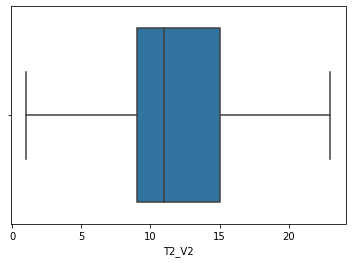

In [ ]:
sns.boxplot(test_data['T2_V2'])

### Dropping T2_V14 and T2_V15 columns

In [ ]:
train_data = train_data.drop(['T2_V14', 'T2_V15'],axis = 1)
test_data = test_data.drop(['T2_V14', 'T2_V15'], axis = 1)

### Treating the left numerical ordinal columns with mean encoding

In [ ]:
drop_cols = ['T2_V14', 'T2_V15']
for i in drop_cols:
  rem_cols.remove(i)
print(rem_cols)

['T1_V3', 'T1_V13', 'T1_V14', 'T2_V6', 'T2_V7', 'T2_V8', 'T2_V10']


In [ ]:
for i in rem_cols:
  median_ord = train_data.groupby([i])['Hazard'].median().to_dict()
  train_data['median_ord' + i] = train_data[i].map(median_ord)
  test_data['median_ord' + i] = test_data[i].map(median_ord)
  del train_data[i]
  del test_data[i]

###Converting Categorical columns

In [ ]:
import string
dict1 = {'Y':1, 'N':0}
dict2 = {v:u for u,v in enumerate(string.ascii_uppercase)}

In [ ]:
for i in y_n_cols:
   train_data[i] = train_data[i].map(dict1)
   test_data[i] = test_data[i].map(dict1)
  
for i in ord_cols:
  train_data[i] = train_data[i].map(dict2)
  test_data[i] = test_data[i].map(dict2)

In [ ]:
for i in mean_cols:
  mean_ord = train_data.groupby([i])['Hazard'].mean().round(3).to_dict()
  train_data['mean_ord' + i] = train_data[i].map(mean_ord)
  test_data['mean_ord' + i] = test_data[i].map(mean_ord)

  del train_data[i]
  del test_data[i]

# Building Model

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
train_data.head()

,Id,Hazard,T1_V1,T1_V2,T1_V6,T1_V7,T1_V8,T1_V10,T1_V12,T1_V17,T2_V1,T2_V2,T2_V3,T2_V4,T2_V9,T2_V11,T2_V12,T2_V13,median_ordT1_V3,median_ordT1_V13,median_ordT1_V14,median_ordT2_V6,median_ordT2_V7,median_ordT2_V8,median_ordT2_V10,mean_ordT1_V4,mean_ordT1_V5,mean_ordT1_V9,mean_ordT1_V11,mean_ordT1_V15,mean_ordT1_V16,mean_ordT2_V5
0,83642,2,10,23,1,1,3,2,1,0,52,14.0,0,8,11,1,0,4,3.0,3.0,4.0,3.0,3.0,3.0,3.0,4.338,4.733,4.586,4.592,4.047,4.612,4.125
1,92530,6,3,18,0,1,1,8,1,0,39,14.0,1,13,12,1,0,2,2.0,3.0,2.0,3.0,2.0,3.0,3.0,3.626,3.980,3.560,3.962,4.047,3.078,4.056
2,86131,4,5,20,0,1,1,7,1,0,66,10.0,0,8,17,1,0,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.626,4.733,4.586,4.592,4.047,4.612,4.125
3,88666,1,4,7,0,1,1,8,1,0,48,11.0,0,11,11,1,0,3,3.0,3.0,2.0,3.0,3.0,3.0,2.0,4.338,3.980,3.047,3.340,4.047,3.078,3.723
4,11122,21,10,21,1,1,2,12,1,0,42,11.0,0,11,6,0,0,3,4.0,3.0,3.0,3.0,3.0,3.0,2.0,4.338,3.674,3.560,3.962,4.047,3.812,4.056


In [ ]:
test_data.head()

,Id,T1_V1,T1_V2,T1_V6,T1_V7,T1_V8,T1_V10,T1_V12,T1_V17,T2_V1,T2_V2,T2_V3,T2_V4,T2_V9,T2_V11,T2_V12,T2_V13,median_ordT1_V3,median_ordT1_V13,median_ordT1_V14,median_ordT2_V6,median_ordT2_V7,median_ordT2_V8,median_ordT2_V10,mean_ordT1_V4,mean_ordT1_V5,mean_ordT1_V9,mean_ordT1_V11,mean_ordT1_V15,mean_ordT1_V16,mean_ordT2_V5
0,67943,9,18,1,1,2,12,1,1,75,13.0,0,5,14,1,0,4,2.0,3.0,3.0,3.0,2.0,3.0,3.0,4.338,4.123,3.560,3.340,4.047,3.978,4.056
1,38287,12,20,1,3,1,12,1,0,27,8.0,1,15,9,1,0,4,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.338,3.674,3.560,3.340,4.047,3.822,3.723
2,51951,14,18,1,1,3,12,2,0,55,18.0,0,18,1,1,0,4,2.0,2.0,3.0,3.0,2.0,3.0,3.0,4.338,4.733,4.586,5.007,4.047,4.638,4.056
3,40476,19,16,1,1,1,3,1,0,25,11.0,0,16,1,1,0,3,2.0,3.0,3.0,3.0,2.0,3.0,3.0,4.357,3.980,3.560,3.962,4.047,3.978,4.056
4,101190,12,21,1,1,1,2,1,0,51,23.0,0,10,20,1,0,2,2.0,3.0,2.0,3.0,3.0,3.0,2.0,3.626,4.733,4.586,4.592,3.173,4.542,4.125


In [ ]:
X = train_data.drop(['Id', 'Hazard'], axis = 1)
y = train_data['Hazard']
X_test = test_data.drop(['Id'], axis = 1)

In [ ]:
print(X.shape)
print(X_test.shape)

(40799, 30)
(10200, 30)


##Importing important libraries for regression

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

###Lasso

In [ ]:
from sklearn.linear_model import Lasso

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = .2, random_state = 156)

In [ ]:
params={'alpha':np.linspace(0.001,.01,100)}
model=Lasso(fit_intercept=True)
grid_search=GridSearchCV(model,cv=10,scoring='neg_mean_absolute_error',
                         param_grid=params,n_jobs=-1,verbose=10)

# you can also make use of mean_poisson_deviance as scoring , this ignores non-positive outcomes
# it might not be avalaible with your version
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([0.001     , 0.00109091, 0.00118182, 0.00127273, 0.00136364,
       0.00145455, 0.00154545, 0.00163636, 0.00172727, 0.00181818,
       0.00190909, 0.002     , 0.00209091, 0.00218182, 0.00227273,
       0.00236364, 0.00245455, 0.00254545, 0.00263636, 0.00272727,
       0.00281818, 0.00290909, 0.003     , 0.00309091, 0.00318182,
       0.00327273, 0.003...
       0.00736364, 0.00745455, 0.00754545, 0.00763636, 0.00772727,
       0.00781818, 0.00790909, 0.008     , 0.00809091, 0.00818182,
       0.00827273, 0.00836364, 0.00845455, 0.00854545, 0.00863636,
       0.00872727, 0.00881818, 0.00890909, 0.009     , 0.00909091,
       0.00918182, 0.00927273, 0.00936364, 0.00945455, 0.00954545,
       0.00963636, 0.00972727, 0.00981818, 0.00990909, 0.01      ])},
             scoring='neg_mean_absolute_error', verbose=10)

In [ ]:
grid_search.best_params_

{'alpha': 0.002090909090909091}

In [ ]:
abs(grid_search.best_score_)

2.763364859084171

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
params_grid = {'min_samples_leaf':[1,3,5,7,9,10,12,13,15,20,25,30],
               'min_samples_split':[1,2,3,5,7,10,15,20],
               'max_depth':[1,2,3,4,5,6,7,8,9,10]}

dt_model = GridSearchCV(DecisionTreeRegressor(),param_grid=params_grid,scoring = 'neg_mean_absolute_error',cv = 10, n_jobs = -1,) 
dt_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 3, 5, 7, 9, 10, 12, 13, 15, 20,
                                              25, 30],
                         'min_samples_split': [1, 2, 3, 5, 7, 10, 15, 20]},
             scoring='neg_mean_absolute_error')

In [ ]:
dt_model.best_params_

{'max_depth': 6, 'min_samples_leaf': 25, 'min_samples_split': 3}

In [ ]:
abs(dt_model.best_score_)

2.770774605857649

###Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
param_grid = {'n_estimators':[1,2,5,10,12,15,18,20,25,30]}
gd_model = GridSearchCV(rf_model,param_grid=param_grid,scoring = 'neg_mean_absolute_error',cv = 10)
gd_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [1, 2, 5, 10, 12, 15, 18, 20, 25, 30]},
             scoring='neg_mean_absolute_error')

In [ ]:
gd_model.best_params_

{'n_estimators': 30}

In [ ]:
abs(gd_model.best_score_)

2.8448947563817137

### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

params = {
    "n_estimators": [100,200,300],
    "max_depth": [4,6,7,10],
    "min_samples_split": [1,2,3,5],
    "learning_rate": [0.01,.02,],
    "loss": ["squared_error"],
}

reg = GradientBoostingRegressor()
gb_model = GridSearchCV(reg, param_grid = params, scoring = 'neg_mean_absolute_error', cv = 2)
gb_model.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.02],
                         'loss': ['squared_error'], 'max_depth': [4, 6, 7, 10],
                         'min_samples_split': [1, 2, 3, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_absolute_error')

In [ ]:
gb_model.best_params_

{'learning_rate': 0.02,
 'loss': 'squared_error',
 'max_depth': 4,
 'min_samples_split': 2,
 'n_estimators': 300}

In [ ]:
abs(gb_model.best_score_)

2.717286001290474

In [ ]:
gb_model_final = GradientBoostingRegressor(learning_rate = .02, loss = 'squared_error', max_depth = 4, min_samples_split = 2, n_estimators = 300)
gb_model_final.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.02, max_depth=4, n_estimators=300)

In [ ]:
y_val_pred = gb_model_final.predict(X_val)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_val, y_val_pred)

2.7367493919222663

### XGBoostRegressor

In [ ]:
from xgboost import XGBRegressor

params = {'max_depth' : [5,6,9,10],
          'learning_rate':[.01,.02],
          'n_estimators':[50,60,70],
          'reg_alpha': [.2]}

xgb = XGBRegressor(objective = "reg:squarederror", booster = "gbtree")
xgb_model = GridSearchCV(xgb, param_grid = params, scoring = 'neg_mean_absolute_error', cv = 5)
xgb_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=XGBRegressor(objective='reg:squarederror'),
             param_grid={'learning_rate': [0.01, 0.02],
                         'max_depth': [5, 6, 9, 10],
                         'n_estimators': [50, 60, 70], 'reg_alpha': [0.2]},
             scoring='neg_mean_absolute_error')

In [ ]:
xgb_model.best_params_

{'learning_rate': 0.02, 'max_depth': 10, 'n_estimators': 60, 'reg_alpha': 0.2}

In [ ]:
abs(xgb_model.best_score_)

2.6150904210681403

In [ ]:
xgb_model_final = XGBRegressor(learning_rate = .02, max_depth = 10, n_estimators = 60, objective = 'reg:squarederror', booster = 'gbtree', reg_alpha = .2)
xgb_model_final.fit(X_train,y_train)

XGBRegressor(learning_rate=0.02, max_depth=10, n_estimators=60,
             objective='reg:squarederror', reg_alpha=0.2)

In [ ]:
y_val_pred = xgb_model_final.predict(X_val)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_val, y_val_pred)

2.6587428638163737

In [ ]:
gb_model_final.fit(X,y)

GradientBoostingRegressor(learning_rate=0.02, max_depth=4, n_estimators=300)

In [ ]:
y_test_pred = xgb_model_final.predict(X_test)

In [ ]:
z = pd.DataFrame(y_test_pred)
z = z.rename(columns = {0:'Hazard'})
z.head()

,Hazard
0,3.710242
1,2.812385
2,4.901166
3,4.798302
4,2.000673


In [ ]:
z.to_csv('Rajat_Bisht_part2.csv', header = True, index = False)